<a href="https://colab.research.google.com/github/GamingCodex/ALPHA/blob/main/Copia_de_Copia_de_U1_Medicion_y_Unidades_Fisica_del_Movimiento_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ejercicio 11 — Densidad del hierro
Dada \(\rho = 7874\,kg/m^3\). Expresá en **g/cm³**, **g/dm³** y **kg/L**.

### Ejercicio 11 — Densidad del hierro
Dada \(\rho = 7874\,kg/m^3\). Expresá en **g/cm³**, **g/dm³** y **kg/L**.

# Física del Movimiento — Unidad 1
## **Medición y sistemas de unidades**
###*Cuaderno de trabajo en Google Colab*

- Datos de la asignatura:
  - **Docente:** Santiago Luna  
  - **Carrera:** Tecnicatura en Desarrollo de Videojuegos  
  - **Modalidad:** Asincrónica (2 h) — se entrega el link de este cuaderno resuelto.

- Datos del/la estudiante:
  - **Nombre y apellido**: Martina lujan flores yuponi
  - **Número de DNI**: 46912302

---
### Objetivos de aprendizaje
- Representar **magnitudes físicas con sus unidades** en Python.
- Realizar **conversiones entre unidades** de longitud, área, volumen, masa, densidad y tiempo.
- Aplicar buenas prácticas: **variables, funciones, validación y documentación**.
- Relacionar el manejo de unidades con **escalas** y **mecánicas** en videojuegos.

> **Nota sobre notación**: en Python el separador decimal es el **punto** (`3.14`), no la coma.

> **¡Atención!**: Si te trabás en algún ejercicio o si no te da el mismo resultado, **igual explicá tu razonamiento en el espacio donde va el código, no dejes la celda incompleta**. **Lo que vale es el intento**.

---
### Cómo entregar
1. Ve a `Archivo → Guardar una copia en Drive` (poné tu **apellido_nombre** en el título).
2. Completá los ejercicios **en las celdas indicadas**.
3. Compartí el cuaderno con permiso de lectura y enviá el **link** por la plataforma.

---
**Instrucciones generales**
- No borres el código de configuración ni los *checks*.
- Podés ejecutar las celdas todas las veces que necesites.
- Si un *check* falla, **leé el mensaje** y corregí. ¡Es parte del aprendizaje!

---
## 0) Preparación del entorno
Vamos a trabajar con la librería **pint** para manejar unidades (magnitudes, conversiones y consistencia dimensional).
Si no se instala automáticamente, ejecutá la celda de instalación.

In [ ]:
try:
    import pint  #se instala la biblioteca pint
except ImportError:
    get_ipython().system('pip -q install pint > /dev/null')
import pint
from math import pi

ureg = pint.UnitRegistry()
Q_ = ureg.Quantity
def fmt(q):             #se configura un formato.
    try:
        return f"{q:.6g}"
    except Exception:
        return str(q)

print("pint versión:", pint.__version__)
print("Unidad base de longitud:", 1*ureg.meter)


pint versión: 0.25
Unidad base de longitud: 1 meter


### Funciones de apoyo (autocorrección suave)
Las siguientes utilidades te ayudan a verificar tus resultados dentro de una **tolerancia razonable**. No cambies esta celda.

In [ ]:
# Utilidades para chequeos
import math

def _to_expected_units(qty, expected):
    if isinstance(expected, pint.Quantity):
        return qty.to(expected.units)
    return qty

def check_quantity(name, student_qty, expected_qty, rtol=1e-9, atol=None):
    # Compara magnitudes físicas con unidades usando tolerancias relativas/absolutas.
    try:
        s = _to_expected_units(student_qty, expected_qty)
        e = expected_qty
        if atol is None:
            atol = abs(e.magnitude) * rtol + 1e-12
        diff = abs(s.magnitude - e.to(s.units).magnitude)
        assert diff <= max(atol, abs(e.magnitude)*rtol), (
            f"❌ {name}: esperado {fmt(e)} pero obtuviste {fmt(student_qty)}; "
            f"diferencia {diff:g} > tolerancia")
        print(f"✅ {name}: {fmt(student_qty)} ≈ {fmt(e)}")
    except Exception as ex:
        raise AssertionError(str(ex))

# Atajos de unidades frecuentes
m, cm, mm, dm, km = ureg.meter, ureg.centimeter, ureg.millimeter, ureg.decimeter, ureg.kilometer
s, min_, h = ureg.second, ureg.minute, ureg.hour
ha = ureg.hectare
L = ureg.liter
kg, g = ureg.kilogram, ureg.gram


---
## 1) Magnitudes, medición y sistema de unidades
**Idea clave:** crear variables que **incluyan el valor y su unidad**, y luego convertir.

### Ejercicio 1 — Longitud
Crear una variable `longitud = 3640 cm` y convertirla a **metros**.

In [ ]:
longitud = 3640*cm
resultado_m = longitud * (1*m/(100*cm)) # convertir a metros
print(f'Resultado: {resultado_m}.')


Resultado: 36.4 meter.


In [ ]:
# Tests
esperado = 36.4 * m
check_quantity("E1", resultado_m, esperado, rtol=1e-12)


✅ E1: 36.4 meter ≈ 36.4 meter


### Ejercicio 2 — Longitud
Convertir **2.83 m** a **cm**.

In [ ]:
from pint import UnitRegistry

# Crear registro de unidades
u = UnitRegistry()

# Valor en metros
valor_m = 2.83 * u.meter

# Convertir a centímetros
resultado_cm = valor_m.to(u.centimeter)

print(f'Resultado: {resultado_cm}')


Resultado: 283.0 centimeter


In [ ]:
# Tests
check_quantity("E2", resultado_cm, 283 * cm, rtol=1e-12)


✅ E2: 283 centimeter ≈ 283 centimeter


### Ejercicio 3 — Longitud compuesta
Un cable mide **10 m, 8 dm, 2 cm y 5 mm**. Expresá su longitud en **m**, **dm** y **cm** (en forma decimal).

In [ ]:
from pint import UnitRegistry
u = UnitRegistry()

# Longitud total en distintas unidades
longitud = (10 * u.meter) + (8 * u.decimeter) + (2 * u.centimeter) + (5 * u.millimeter)

# Usar los nombres que pide el test
L_m = longitud.to(u.meter)
L_dm = longitud.to(u.decimeter)
L_cm = longitud.to(u.centimeter)

print(f"Resultado en metros: {L_m}")
print(f"Resultado en decímetros: {L_dm}")
print(f"Resultado en centímetros: {L_cm}")


Resultado en metros: 10.825000000000001 meter
Resultado en decímetros: 108.25000000000001 decimeter
Resultado en centímetros: 1082.5 centimeter


In [ ]:
check_quantity("E3-m", L_m, 10.825 * m)
check_quantity("E3-dm", L_dm, 108.25 * dm)
check_quantity("E3-cm", L_cm, 1082.5 * cm)



✅ E3-m: 10.825 meter ≈ 10.825 meter
✅ E3-dm: 108.25 decimeter ≈ 108.25 decimeter
✅ E3-cm: 1082.5 centimeter ≈ 1082.5 centimeter


### Ejercicio 4 — Rapidez
Convertir **36 km/h** a **m/s**.

In [ ]:
from pint import UnitRegistry
u = UnitRegistry()

# se define la velocidad en km/h
v1 = 36 * u.kilometer / u.hour

# se realiza la conversion a m/s
v1_ms = v1.to(u.meter / u.second)

print(f"Resultado: {v1_ms}")


Resultado: 10.0 meter / second


In [ ]:
# Test
check_quantity("E4", v1_ms, 10 * (m/s))


✅ E4: 10 meter / second ≈ 10 meter / second


### Ejercicio 5 — Rapidez
Un móvil recorre **1 km por minuto**. Expresá su rapidez en **km/h** y **m/s**.

In [ ]:
v2 = 1 * km / min_
v2_kmh = v2.to(km/h)   # 60 km/h
v2_ms = v2.to(m/s)     # 16.666... m/s


In [ ]:
# Tests
check_quantity("E5-km/h", v2_kmh, 60 * (km/h))
check_quantity("E5-m/s", v2_ms, (60 * (km/h)).to(m/s))


✅ E5-km/h: 60 kilometer / hour ≈ 60 kilometer / hour
✅ E5-m/s: 16.6667 meter / second ≈ 16.6667 meter / second


### Ejercicio 6 — Rapidez y distancia
Un automóvil se desplaza **6 km cada 3 min**.
1) Calcular su **velocidad** en **m/s** y **km/h**.  
2) ¿Qué **distancia** recorre en **2.5 h** a esa velocidad? (en km)

In [ ]:
trayecto = 6 * km
lapso = 3 * min_
v3 = trayecto / lapso
v3_ms = v3.to(m/s)        # ~33.333... m/s
v3_kmh = v3.to(km/h)      # 120 km/h

tiempo_viaje = 2.5 * h
recorrido = v3.to(u.kilometer / u.hour) * tiempo_viaje  # resultado con unidades

In [ ]:
# Tests
check_quantity("E6-m/s", v3_ms, 33.3333333333 * (m/s), rtol=1e-6)
check_quantity("E6-km/h", v3_kmh, 120 * (km/h))
check_quantity("E6-dist", recorrido.to(km), 300 * km)


✅ E6-m/s: 33.3333 meter / second ≈ 33.3333 meter / second
✅ E6-km/h: 120 kilometer / hour ≈ 120 kilometer / hour
✅ E6-dist: 300 kilometer ≈ 300 kilometer


### Ejercicio 7 — Área en hectáreas
Rectángulo de **643.61 m** × **352.03 m**. Calcular el área en **hectáreas (ha)**.

In [ ]:
b = 643.61 * m
h_rect = 352.03 * m
A = b * h_rect
A_ha = A.to(u.hectare)

In [ ]:
# Test
check_quantity("E7", A_ha, 22.66 * ha, rtol=1e-2)  # tolerancia 1%


✅ E7: 22.657 hectare ≈ 22.66 hectare


### Ejercicio 8 — Volumen de un cilindro (en litros)
Cilindro de base circular con **r = 48.2 cm** y **h = 43 cm**.
Recordá: \(V = \pi r^2 h\) y \(1\,L = 1\,dm^3\).

In [ ]:
import math
r = 48.2 * cm
h_cil = 43 * cm
V = math.pi * (r**2) * h_cil
V_L = V.to(L)

In [ ]:
# Test
check_quantity("E8", V_L, 313.68 * L, rtol=2e-3)  # ~0.2%


✅ E8: 313.843 liter ≈ 313.68 liter


#### Ejercicio 9 — Masa
Convertir **453 g** a **kg**.

In [ ]:
m_g = 453 * g
m_kg = m_g.to(kg)

In [ ]:
# Test
check_quantity("E9", m_kg, 0.453 * kg)


✅ E9: 0.453 kilogram ≈ 0.453 kilogram


### Ejercicio 10 — Densidad del agua
Tomá \(\rho = 1\,g/cm^3\). Expresala en **kg/m³**, **g/dm³** y **kg/L**.

In [ ]:
rho = 1 * g / (cm**3)
rho_kg_m3 = rho.to(kg / (m**3))
rho_g_dm3 = rho.to(g / (dm**3))
rho_kg_L = rho.to(kg / L)

In [ ]:
# Tests
check_quantity("E10-a", rho_kg_m3, 1000 * (kg/(m**3)))
check_quantity("E10-b", rho_g_dm3, 1000 * (g/(ureg.decimeter**3)))
check_quantity("E10-c", rho_kg_L, 1 * (kg/L))


✅ E10-a: 1000 kilogram / meter ** 3 ≈ 1000 kilogram / meter ** 3
✅ E10-b: 1000 gram / decimeter ** 3 ≈ 1000 gram / decimeter ** 3
✅ E10-c: 1 kilogram / liter ≈ 1 kilogram / liter


### Ejercicio 11 — Densidad del hierro
Dada \(\rho = 7874\,kg/m^3\). Expresá en **g/cm³**, **g/dm³** y **kg/L**.

In [7]:
from pint import UnitRegistry
ureg = UnitRegistry()
kg, m, g, cm, dm, L = ureg.kilogram, ureg.meter, ureg.gram, ureg.centimeter, ureg.decimeter, ureg.liter

rho_fe = 7874 * kg/(m**3)

rho_fe_g_cm3 = rho_fe.to(g/(cm**3))
rho_fe_g_dm3 = rho_fe.to(g/(dm**3))
rho_fe_kg_L = rho_fe.to(kg/L)

print(f'Densidad en g/cm^3: {rho_fe_g_cm3}.')
print(f'Densidad en g/dm^3: {rho_fe_g_dm3}.')
print(f'Densidad en kg/L: {rho_fe_kg_L}.')

Densidad en g/cm^3: 7.874000000000001 gram / centimeter ** 3.
Densidad en g/dm^3: 7874.000000000002 gram / decimeter ** 3.
Densidad en kg/L: 7.874000000000001 kilogram / liter.


In [9]:
import pint
from pint import UnitRegistry
ureg = UnitRegistry()
kg, m, g, cm, dm, L = ureg.kilogram, ureg.meter, ureg.gram, ureg.centimeter, ureg.decimeter, ureg.liter

def _to_expected_units(qty, expected):
    if isinstance(expected, pint.Quantity):
        return qty.to(expected.units)
    return qty

def check_quantity(name, student_qty, expected_qty, rtol=1e-9, atol=None):
    # Compara magnitudes físicas con unidades usando tolerancias relativas/absolutas.
    try:
        s = _to_expected_units(student_qty, expected_qty)
        e = expected_qty
        if atol is None:
            atol = abs(e.magnitude) * rtol + 1e-12
        diff = abs(s.magnitude - e.to(s.units).magnitude)
        assert diff <= max(atol, abs(e.magnitude)*rtol), (
            f"❌ {name}: esperado {fmt(e)} pero obtuviste {fmt(student_qty)}; "
            f"diferencia {diff:g} > tolerancia")
        print(f"✅ {name}: {fmt(student_qty)} ≈ {fmt(e)}")
    except Exception as ex:
        raise AssertionError(str(ex))

def fmt(q):
    try:
        return f"{q:.6g}"
    except Exception:
        return str(q)

# Tests
check_quantity("E11-a", rho_fe_g_cm3, 7.874 * (g/(cm**3)), rtol=1e-3)
check_quantity("E11-b", rho_fe_g_dm3, 7874 * (g/(ureg.decimeter**3)))
check_quantity("E11-c", rho_fe_kg_L, 7.874 * (kg/L), rtol=1e-3)

✅ E11-a: 7.874 gram / centimeter ** 3 ≈ 7.874 gram / centimeter ** 3
✅ E11-b: 7874 gram / decimeter ** 3 ≈ 7874 gram / decimeter ** 3
✅ E11-c: 7.874 kilogram / liter ≈ 7.874 kilogram / liter


---
### Ejercicio 12 — Desafío: La Tierra
Teniendo en cuenta que la masa de la Tierra es $M_\oplus = 5.97\times 10^{24}\,\text{kg}$ y su radio es $R_\oplus = 6371\, \text{km}$, y asumiendo que nuestro planeta es una esfera perfecta, calculá su volumen (en $\text{m}^3$) y su densidad media (en $\frac{\text{kg}}{\text{m}^3}$).

**Ayuda**:
- El volumen de una esfera se puede calcular en función de su radio mediante la fórmula: $V = \tfrac{4}{3}\pi R^3$.
- La densidad media de un cuerpo se puede calcular mediante: $\rho = \dfrac{M}{V}$.

In [10]:
# Tu solución
import math
from pint import UnitRegistry
ureg = UnitRegistry()
kg, km, m = ureg.kilogram, ureg.kilometer, ureg.meter


M = 5.97e24 * kg
R = 6371 * km
V_tierra = (4/3) * math.pi * R**3
rho_tierra = M / V_tierra

print(f"Volumen de la Tierra en m^3: {V_tierra.to(m**3)}.")
print(f"Densidad media de la Tierra en kg/m^3: {rho_tierra.to(kg/(m**3))}.")

Volumen de la Tierra en m^3: 1.0832069168457536e+21 meter ** 3.
Densidad media de la Tierra en kg/m^3: 5511.41236928615 kilogram / meter ** 3.


In [11]:
# Tests (valores aproximados)
check_quantity("E12-V", V_tierra.to(m**3), 1.08e21 * (m**3), rtol=5e-3)
check_quantity("E12-rho", rho_tierra.to(kg/(m**3)), 5515 * (kg/(m**3)), rtol=5e-3)


✅ E12-V: 1.08321e+21 meter ** 3 ≈ 1.08e+21 meter ** 3
✅ E12-rho: 5511.41 kilogram / meter ** 3 ≈ 5515 kilogram / meter ** 3


---
### Ejercicio 13 — Actividad creativa:  Escalas en videojuegos
1. Definí una función `convertir_unidades(valor, unidad_origen, unidad_destino)` que use **pint**.  
2. Elegí un objeto del mundo real (p.ej., **espada** de 1.2 m de largo y 4 cm de ancho) y convertí a píxeles usando una escala
   configurable (p.ej., `1 m = 50 px`).  
3. Calculá el **área** del sprite en distintas unidades y discutí cómo cambia la percepción de tamaño al cambiar la escala.

In [12]:
# Tu solución
# 1) Función genérica de conversión
def convertir_unidades(valor, unidad_origen, unidad_destino):
    q = Q_(valor, ureg.parse_units(unidad_origen))
    return q.to(ureg.parse_units(unidad_destino))

# 2) Parámetros de ejemplo (podés cambiarlos)
# Dimensiones para una armadura (ejemplo: peto)
long_armadura = 0.7 * m  # 70 cm de largo
ancho_armadura = 0.5 * m # 50 cm de ancho
escala_px_por_m = 50  # px/m

# Conversión a píxeles (solo escala, no es una unidad física de pint)
long_px = (long_armadura.to(m).magnitude) * escala_px_por_m
ancho_px = (ancho_armadura.to(m).magnitude) * escala_px_por_m
area_sprite_px2 = long_px * ancho_px

# 3) Área en unidades físicas
area_m2 = (long_armadura * ancho_armadura).to(m**2)
area_cm2 = (long_armadura * ancho_armadura).to(cm**2)

print(f"Largo en píxeles: {long_px:.1f} px")
print(f"Ancho en píxeles: {ancho_px:.1f} px")
print(f"Área del sprite: {area_sprite_px2:.1f} px^2")
print(f"Área física en metros cuadrados: {fmt(area_m2)}, en centímetros cuadrados: {fmt(area_cm2)}")

Largo en píxeles: 35.0 px
Ancho en píxeles: 25.0 px
Área del sprite: 875.0 px^2
Área física en metros cuadrados: 0.35 meter ** 2, en centímetros cuadrados: 3500 centimeter ** 2


---
### Ejercicio 14 (Opcional) — Sin librerías: conversor propio
Implementá un conversor simple para practicar lógica y tablas de factores.

In [13]:
# Tu solución (opcional)
# Diccionarios de factores a la unidad base (SI)
factores_long = {
    'mm': 1e-3,
    'cm': 1e-2,
    'dm': 1e-1,
    'm': 1.0,
    'km': 1e3,
}

factores_mass = {
    'g': 1e-3,
    'kg': 1.0,
}

factores_time = {
    's': 1.0,
    'min': 60.0,
    'h': 3600.0,
}

# Ejemplo: convertir longitud
def convertir_longitud(valor, u_origen, u_destino):
    """Convierte un valor de longitud entre unidades."""
    if u_origen not in factores_long or u_destino not in factores_long:
        return "Unidades de longitud no soportadas"
    base_m = valor * factores_long[u_origen]
    return base_m / factores_long[u_destino]

def convertir_masa(valor, u_origen, u_destino):
    """Convierte un valor de masa entre unidades."""
    if u_origen not in factores_mass or u_destino not in factores_mass:
        return "Unidades de masa no soportadas"
    base_kg = valor * factores_mass[u_origen]
    return base_kg / factores_mass[u_destino]

def convertir_tiempo(valor, u_origen, u_destino):
    """Convierte un valor de tiempo entre unidades."""
    if u_origen not in factores_time or u_destino not in factores_time:
        return "Unidades de tiempo no soportadas"
    base_s = valor * factores_time[u_origen]
    return base_s / factores_time[u_destino]

# Para velocidad y densidad, necesitarías combinar las conversiones de longitud, masa y tiempo
# Ejemplo de conversión de velocidad (km/h a m/s)
def convertir_velocidad(valor, u_origen, u_destino):
    """Convierte un valor de velocidad entre unidades comunes (ej: km/h a m/s)."""
    if u_origen == 'km/h' and u_destino == 'm/s':
        # Convertir km a m y h a s
        valor_m = convertir_longitud(valor, 'km', 'm')
        valor_s = convertir_tiempo(1, 'h', 's') # Convertir 1 hora a segundos
        return valor_m / valor_s
    elif u_origen == 'm/s' and u_destino == 'km/h':
        # Convertir m a km y s a h
        valor_km = convertir_longitud(valor, 'm', 'km')
        valor_h = convertir_tiempo(1, 's', 'h') # Convertir 1 segundo a horas
        return valor_km / valor_h
    else:
        return "Conversión de velocidad no soportada para estas unidades"

# Para densidad (ej: kg/m^3 a g/cm^3)
def convertir_densidad(valor, u_origen, u_destino):
    """Convierte un valor de densidad entre unidades comunes (ej: kg/m^3 a g/cm^3)."""
    if u_origen == 'kg/m^3' and u_destino == 'g/cm^3':
        # Convertir kg a g y m^3 a cm^3 (1 m^3 = 100^3 cm^3 = 1,000,000 cm^3)
        valor_g = convertir_masa(valor, 'kg', 'g')
        valor_cm3 = convertir_longitud(1, 'm', 'cm')**3 # Convertir 1 m^3 a cm^3
        return valor_g / valor_cm3
    elif u_origen == 'g/cm^3' and u_destino == 'kg/m^3':
        # Convertir g a kg y cm^3 a m^3 (1 cm^3 = 10^-6 m^3)
        valor_kg = convertir_masa(valor, 'g', 'kg')
        valor_m3 = convertir_longitud(1, 'cm', 'm')**3 # Convertir 1 cm^3 a m^3
        return valor_kg / valor_m3
    else:
         return "Conversión de densidad no soportada para estas unidades"


# Probá:
print("36 km/h a m/s con tabla propia")
km_h_a_m_s = convertir_velocidad(36, 'km/h', 'm/s')
print(km_h_a_m_s)

print("\n10 m a cm:")
print(convertir_longitud(10, 'm', 'cm'))

print("\n500 g a kg:")
print(convertir_masa(500, 'g', 'kg'))

print("\n120 min a h:")
print(convertir_tiempo(120, 'min', 'h'))

print("\n1000 kg/m^3 a g/cm^3 (Densidad del agua):")
print(convertir_densidad(1000, 'kg/m^3', 'g/cm^3'))

36 km/h a m/s con tabla propia
10.0

10 m a cm:
1000.0

500 g a kg:
0.5

120 min a h:
2.0

1000 kg/m^3 a g/cm^3 (Densidad del agua):
1.0


---
## 2) Sistemas de referencia y coordenadas

**Ejercicio 13.** Un punto $P$ se mueve sobre un camino recto. En la tabla se da la posición $x$ (m) en función del tiempo $t$ (s).  Representá: (i) la **trayectoria en una recta** y (ii) el **gráfico $x(t)$** con `matplotlib`.

| t (s) | 0.0 | 0.5 | 1.0 | 1.5 | 2.0 | 2.5 |
|:-----:|:---:|:---:|:---:|:---:|:---:|:---:|
| x (m) | -2.00 | -1.75 | -1.00 | 0.25 | 2.00 | 4.25 |

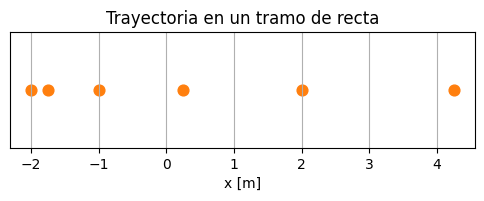

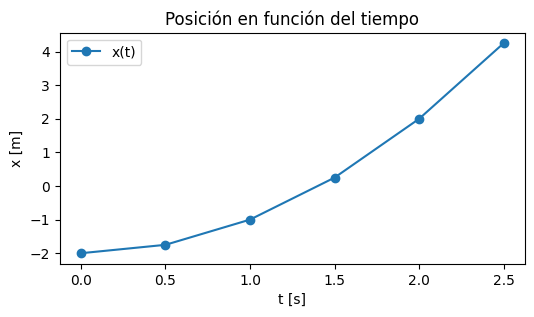

In [15]:
# Escribe tu código aquí

import numpy as np
import matplotlib.pyplot as plt

t = np.array([0.0, 0.5, 1.0, 1.5, 2.0, 2.5])
x = np.array([-2.00, -1.75, -1.00, 0.25, 2.00, 4.25])

# (i) Trayectoria en la recta real (representar puntos sobre y=0)
plt.figure(figsize=(6,1.5))
plt.scatter(x, np.zeros_like(x), c='C1', s=60)
plt.yticks([])
plt.xlabel('x [m]')
plt.title('Trayectoria en un tramo de recta')
plt.grid(True, axis='x')
plt.show()

# (ii) Gráfico x(t)
plt.figure(figsize=(6,3))
plt.plot(t, x, 'o-', label='x(t)')
plt.xlabel('t [s]')
plt.ylabel('x [m]')
plt.title('Posición en función del tiempo')
plt.legend()
plt.show()

**Ejercicio 14.** Repetí el análisis para la siguiente tabla.

| t (s) | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 |
|:-----:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:--:|:---:|
| x (m) | -2.0 | -1.5 | -1.0 | -0.5 | 0.0 | 0.5 | 1.0 | 1.5 | 2.0 | 2.5 | 3.0 |

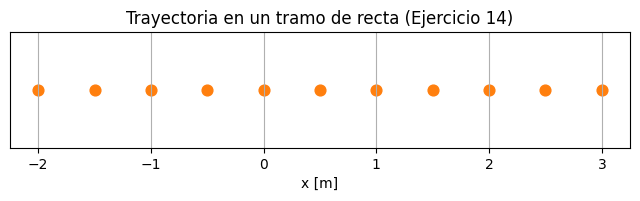

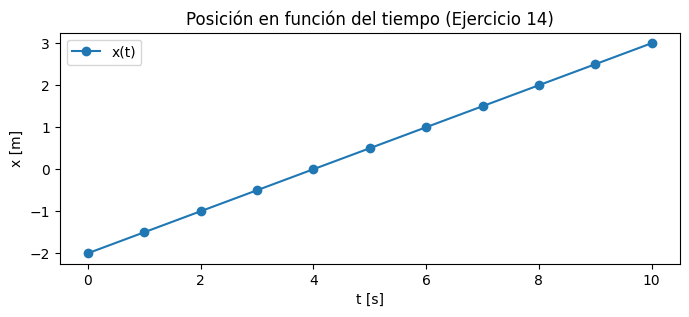

In [16]:
# Escribí tu código acá

# Creá los arrays t y x, y realizá los dos gráficos como en el Ejercicio 13.
import numpy as np
import matplotlib.pyplot as plt

t = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
x = np.array([-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0])

# (i) Trayectoria en la recta real (representar puntos sobre y=0)
plt.figure(figsize=(8, 1.5))
plt.scatter(x, np.zeros_like(x), c='C1', s=60)
plt.yticks([])
plt.xlabel('x [m]')
plt.title('Trayectoria en un tramo de recta (Ejercicio 14)')
plt.grid(True, axis='x')
plt.show()

# (ii) Gráfico x(t)
plt.figure(figsize=(8, 3))
plt.plot(t, x, 'o-', label='x(t)')
plt.xlabel('t [s]')
plt.ylabel('x [m]')
plt.title('Posición en función del tiempo (Ejercicio 14)')
plt.legend()
plt.show()

**Ejercicio 15 (Ejemplo resuelto).** Las coordenadas cartesianas de $P$ son $(4, 3)$.  Obtené sus **coordenadas polares** $(r,\,\varphi)$ con $\varphi$ en **grados**.

r = 5.000
phi = 36.87°


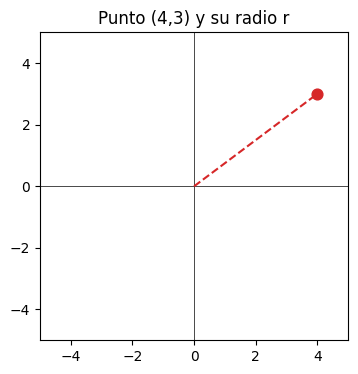

In [17]:
# Cartesiano -> Polar (con atan2 para cuadrantes correctos)

xp, yp = 4, 3
r = math.hypot(xp, yp)
phi_deg = math.degrees(math.atan2(yp, xp))
print(f"r = {r:.3f}")
print(f"phi = {phi_deg:.2f}°")

# Extra: representación gráfica
plt.figure(figsize=(4,4))
plt.axhline(0, color='k', lw=0.5)
plt.axvline(0, color='k', lw=0.5)
plt.scatter([xp],[yp], c='C3', s=60)
plt.plot([0,xp],[0,yp], 'C3--')
plt.xlim(-5,5); plt.ylim(-5,5)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Punto (4,3) y su radio r')
plt.show()

**Ejercicio 16.** Ubicá en un plano cartesiano los puntos $P_1(4,3)$, $P_2(-2,1)$, $P_3(-3,-4)$, $P_4(2,-3)$ y obtené sus polares usando:  $r=\sqrt{x^2+y^2}$, $\;\tan\,\theta = y/x$ (cuidá el cuadrante; usá `atan2`).

P1: r = 5.000, phi = 36.87°
P2: r = 2.236, phi = 153.43°
P3: r = 5.000, phi = -126.87°
P4: r = 3.606, phi = -56.31°


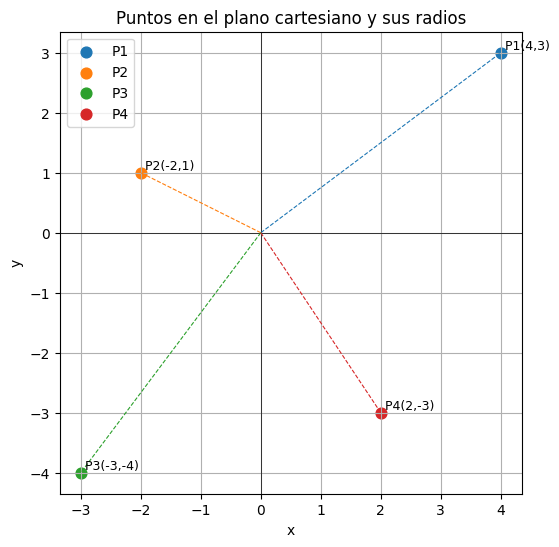

In [18]:
# Escribí tu código acá

puntos = {
    'P1': (4, 3),
    'P2': (-2, 1),
    'P3': (-3, -4),
    'P4': (2, -3),
}

# Calcula (r, theta_deg) y grafica los puntos
import math
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6, 6))
plt.axhline(0, color='k', lw=0.5)
plt.axvline(0, color='k', lw=0.5)
plt.grid(True, which='both')
plt.gca().set_aspect('equal', adjustable='box')

for nombre, (x, y) in puntos.items():
    r = math.hypot(x, y)
    phi_deg = math.degrees(math.atan2(y, x))
    print(f"{nombre}: r = {r:.3f}, phi = {phi_deg:.2f}°")

    plt.scatter([x], [y], label=nombre, s=60)
    plt.plot([0, x], [0, y], linestyle='--', linewidth=0.8)
    plt.text(x, y, f' {nombre}({x},{y})', fontsize=9, ha='left', va='bottom')


plt.title('Puntos en el plano cartesiano y sus radios')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**Ejercicio 17.** Las coordenadas polares de un punto son $(r,\,\varphi)=(2, 225°)$.  Calculá sus **coordenadas cartesianas** $(x,y)$.

In [19]:
# Escribí tu código acá

import numpy as np

r = 2
phi_deg = 225

phi_rad = np.deg2rad(phi_deg)
x = r * np.cos(phi_rad)
y = r * np.sin(phi_rad)

print(f"Las coordenadas cartesianas son: x = {x:.3f}, y = {y:.3f}")

Las coordenadas cartesianas son: x = -1.414, y = -1.414


**Ejercicio 18.** Convertí a cartesianas las siguientes coordenadas polares:

| Punto | $r$ (m) | $\varphi$ |
|:-----:|:-------:|:----------:|
| $P_1$ | 1.0     | 30°        |
| $P_2$ | $\sqrt{2}$ | 135°   |
| $P_3$ | 4       | 240°       |
| $P_4$ | $\sqrt{3}$ | 300°   |

In [20]:
# Escribí tu código acá

import numpy as np

polares = {'P1': (1.0, 30),    'P2': (np.sqrt(2), 135),    'P3': (4.0, 240),    'P4': (np.sqrt(3), 300)}

# Calcula (x,y) para cada punto
for nombre, (r, phi_deg) in polares.items():
    phi_rad = np.deg2rad(phi_deg)
    x = r * np.cos(phi_rad)
    y = r * np.sin(phi_rad)
    print(f"{nombre}: x = {x:.3f}, y = {y:.3f}")

P1: x = 0.866, y = 0.500
P2: x = -1.000, y = 1.000
P3: x = -2.000, y = -3.464
P4: x = 0.866, y = -1.500


---
## **Desafíos** (opcional, recomendados)

1. **Conversor de unidades universal**
Implementá funciones para convertir **longitudes, masas, tiempos, velocidades y densidades** entre unidades comunes.
Sugerencia: usá un diccionario con factores respecto de la unidad base (m, kg, s, m/s, kg/m³).

2. **Comparativa de densidades**     
Hacé un gráfico de **barras** comparando las densidades de varias sustancias en las unidades que elijas (ej., kg/m³), mostrando etiquetas numéricas. Pueden ser todas las que quieras como el agua, aceite, hierro, etc., pero deben ser al menos tres sustancias.

In [21]:
# Desafío 1: Conversor de unidades universal (plantilla)
# Definí acá tus diccionarios de conversión y funciones que te ayuden
# Ejemplo (longitud): la base es el metro
length_factor = {
    'mm': 1e-3,
    'cm': 1e-2,
    'dm': 1e-1,
    'm': 1.0,
    'km': 1e3,
}

mass_factor = {
    'g': 1e-3,
    'kg': 1.0,
}

time_factor = {
    's': 1.0,
    'min': 60.0,
    'h': 3600.0,
}

speed_factor = {
    'm/s': 1.0,
    'km/h': 1000/3600,
}

density_factor = {
    'kg/m^3': 1.0,
    'g/cm^3': 1000.0,   # 1 g/cm^3 = 1000 kg/m^3
    'g/dm^3': 1.0,      # 1 g/dm^3 = 1 kg/m^3? -> OJO, corregí: 1 g/dm^3 = 1e-3 kg/(dm^3) = 1e-3 kg/(0.1 m)^3 = 1e-3 kg / 1e-3 m^3 = 1 kg/m^3
}

# Nota: completá/ajustá los factores y escribí funciones como convert(valor, unidad_inicial, unidad_final, diccionario_factores)

def convert(valor, unidad_inicial, unidad_final, factores):
    """Convierte un valor entre unidades usando un diccionario de factores."""
    if unidad_inicial not in factores or unidad_final not in factores:
        return "Unidades no soportadas"
    # Convertir a la unidad base
    valor_base = valor * factores[unidad_inicial]
    # Convertir de la unidad base a la unidad final
    return valor_base / factores[unidad_final]

# Ejemplo de uso:
print("Convertir 10 km a m:", convert(10, 'km', 'm', length_factor))
print("Convertir 500 g a kg:", convert(500, 'g', 'kg', mass_factor))
print("Convertir 2 h a s:", convert(2, 'h', 's', time_factor))
print("Convertir 36 km/h a m/s:", convert(36, 'km/h', 'm/s', speed_factor))
print("Convertir 1 g/cm^3 a kg/m^3:", convert(1, 'g/cm^3', 'kg/m^3', density_factor))

Convertir 10 km a m: 10000.0
Convertir 500 g a kg: 0.5
Convertir 2 h a s: 7200.0
Convertir 36 km/h a m/s: 10.0
Convertir 1 g/cm^3 a kg/m^3: 1000.0


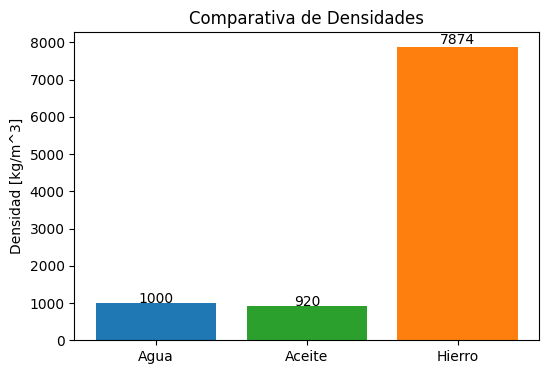

In [22]:
# Desafío 2: Comparativa de densidades (plantilla)

# Escribí tu código acá

rho_agua = 1000  # kg/m^3
rho_hierro = 7874 # kg/m^3
rho_aceite = 920 # kg/m^3 (valor aproximado)

materiales = ['Agua', 'Aceite', 'Hierro']
valores = [rho_agua, rho_aceite, rho_hierro]

import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(materiales, valores, color=['C0', 'C2', 'C1'])
for i,v in enumerate(valores):
    plt.text(i, v*1.01, f"{v}", ha='center')

plt.ylabel('Densidad [kg/m^3]')
plt.title('Comparativa de Densidades')
plt.show()

---
### Notas

- Podés agregar celdas (`+ Código` o `+ Texto`) para justificar tus pasos.
- Recordá **probar con casos de prueba** (por ejemplo, convertir ida y vuelta) para validar tus funciones.